# 처방기록 중 관심약품 필터링 파일

In [2]:
# 라이브러리를 불러옵니다.
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 추출 (항우울제)
항우울제로 사용되는 약물들만 추출하도록 하겠습니다.

In [47]:
# 항우울제 매핑 데이터를 불러옵니다.
ad_mapping = pd.read_csv('data/antidepressant_mapping_v2.csv', encoding='utf-8')
MI_codes = ad_mapping['MI_code'].values
ATC_codes = ad_mapping['ATC_code'].unique()

2017년도 데이터

In [4]:
# 데이터의 구조를 확인합니다.
pd.read_csv('./raw_data/2017/국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', nrows=3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,1,340428,1,1,15,31,20170629,131801ATB,1.0,3,10,15.0,450,20181126
1,2017,1,340428,2,1,15,31,20170629,172101ATB,1.0,3,10,16.0,480,20181126
2,2017,1,340428,3,1,15,31,20170629,193302ATB,1.0,3,10,98.0,2940,20181126


2018년도 데이터

In [9]:
# 데이터의 구조를 확인합니다.
pd.read_csv('raw_data/2018/NHIS_OPEN_T60_2018_PART1.csv', encoding='cp949', nrows=3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회투약량,1일투약량,총투여일수,단가,금액,데이터공개일자
0,2018,1,18610814,1,1,6,28,20180130,101430ATR,2.0,3,3,51.0,918,20191217
1,2018,1,43905715,3,1,6,28,20180816,240301ATB,1.0,3,2,135.0,810,20191217
2,2018,1,43905715,2,1,6,28,20180816,222801ATB,1.0,2,2,270.0,1080,20191217


2019년도 데이터

In [5]:
pd.read_csv('./raw_data/2019/T60_2019_1백만.1.csv', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2019,1,103911229,3,1,2,41,20190225,101842AGN,0.6667,3,3,90.0,540,20201222
1,2019,1,103911229,1,1,2,41,20190225,244330ASY,7.0000,3,3,15.0,945,20201222
2,2019,1,103911229,2,1,2,41,20190225,183135ASY,8.0000,3,3,20.0,1440,20201222


2020년도 데이터

In [6]:
pd.read_csv('./raw_data/2020/HP_T60_2020_1.CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29


In [10]:
# 모든 파일에서 주성분코드 리스트에 있는 주성분코드가 포함된 행만 추출합니다.
for year in range(2017, 2021):  # 2017~2020년 데이터를 읽어옵니다.
    rows = []
    for file in os.listdir(f'./raw_data/{year}'):  # 모든 파일을 읽어옵니다.
        for chunk in pd.read_csv(f'./raw_data/{year}/' + file, encoding='cp949', chunksize=100000):
            rows.append(chunk[chunk['약품일반성분명코드'].isin(MI_codes)])
    pd.concat(rows).to_csv(f'./data/antidepressant_prescription_{year}.csv', index=False)

2021년도 데이터 (주의: 컬럼명 다름)

In [11]:
pd.read_csv('raw_data/2021/국민건강보험공단_의약품처방정보_01_20211231.csv', encoding='cp949', nrows=3).head()

,STND_Y,IDV_ID,KEY_SEQ,SEQ_NO,SEX,AGE_GROUP,SIDO,RECU_FR_DT,GNL_NM_CD,DD_MQTY_FREQ,DD_EXEC_FREQ,MDCN_EXEC_FREQ,UN_COST,AMT,DATA_STD_DT
0,2021,628074,9261,1,2,13,41,2021-09-13,347701ACH,1.0,1,3,521.0,1563,2022-08-11
1,2021,730013,13348,1,2,13,41,2021-02-17,493801ATB,1.0,1,3,534.0,1602,2022-08-11
2,2021,97734,16827,1,2,13,41,2021-06-10,374602ATB,1.0,1,3,469.0,1407,2022-08-11


In [68]:
rows = []
for file in os.listdir(f'./raw_data/2021'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2021/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['GNL_NM_CD'].isin(MI_codes)])
pd.concat(rows).to_csv(f'./data/antidepressant_prescription_2021.csv', index=False)

2022년도 데이터 (주의: 성분명코드 변환)

In [27]:
pd.read_csv('raw_data/2022/국민건강보험공단_의약품처방정보_2022_1(수정).CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2022,278817,5270722,1,2,13,41,2022-03-04,M01AE,1.0,3,3
1,2022,132289,13021551,1,2,13,41,2022-03-23,M01AE,1.0,3,3
2,2022,151731,10392393,1,2,13,41,2022-04-18,M01AE,1.0,3,3


In [30]:
rows = []
for file in os.listdir(f'./raw_data/2022'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2022/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['약품일반성분명코드(ATC코드)'].str[:4] == 'N06A'])
pd.concat(rows).to_csv('./data/antidepressant_prescription_2022.csv', index=False)

In [ ]:
df_2022 = pd.read_csv('./data/antidepressant_prescription_2022.csv')
len(df_2022)

12662

2023년도 데이터

In [68]:
pd.read_csv('raw_data/2023/1.국민건강보험공단_의약품처방정보_2023_1.CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2023,170188,13890231,1,2,4,41,2023-01-09,2229A,1.0,3,3
1,2023,322493,4188428,1,2,4,41,2023-01-03,2229A,1.0,3,3
2,2023,223677,6819879,1,2,4,41,2023-07-12,2229A,1.0,3,3


2023년도 데이터는 주성분코드에서 변형된 코드를 사용합니다.

주성분코드의 첫 4자리와 7번째자리의 숫자를 합쳐 만든 코드입니다.

In [38]:
ad_mapping['MI_code_short'] = ad_mapping['MI_code'].str[:4] + ad_mapping['MI_code'].str[6]
MI_codes_short = ad_mapping['MI_code_short'].unique()

In [22]:
rows = []
for file in os.listdir(f'./raw_data/2023'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2023/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['약품일반성분명코드(ATC코드)'].isin(MI_codes_short)])
pd.concat(rows).to_csv('./data/antidepressant_prescription_2023.csv', index=False)

---
## ATC 코드로 통일화

In [69]:
# 모든 데이터를 같이 불러옵니다.
df_2017 = pd.read_csv('./data/antidepressant_prescription_2017.csv')
df_2018 = pd.read_csv('./data/antidepressant_prescription_2018.csv')
df_2019 = pd.read_csv('./data/antidepressant_prescription_2019.csv')
df_2020 = pd.read_csv('./data/antidepressant_prescription_2020.csv')
df_2021 = pd.read_csv('./data/antidepressant_prescription_2021.csv')
# df_2022 = pd.read_csv('./data/antidepressant_prescription_2022.csv')
# df_2023 = pd.read_csv('./data/antidepressant_prescription_2023.csv')

In [70]:
for df in [df_2017, df_2018, df_2019, df_2020, df_2021]:
    print(len(df))

205686
212869
231136
257946
276131


### 매핑 진행

In [71]:
# 17, 18, 19, 20, 21년도의 주성분코드를 ATC코드로 변환합니다
columns = df_2017.columns
for df_year, year in zip([df_2017, df_2018, df_2019, df_2020, df_2021], ['2017', '2018', '2019', '2020', '2021']):
    df_year.columns = columns  # 컬럼명을 통일합니다.
    df_year['ATC코드'] = df_year['약품일반성분명코드'].map(ad_mapping.set_index('MI_code')['ATC_code'])
    print(f"{year} 매핑 실패 개수: {df_year['ATC코드'].isnull().sum()}")
    # df_year.drop(['약품일반성분명코드', '단가', '금액', '데이터 공개일자'], axis=1, inplace=True)

2017 매핑 실패 개수: 0
2018 매핑 실패 개수: 0
2019 매핑 실패 개수: 0
2020 매핑 실패 개수: 0
2021 매핑 실패 개수: 0


In [67]:
ad_mapping[ad_mapping['MI_code'] == '193207ACR']

,MI_code,ATC_code,ATC_name


In [65]:
df_2021[df_2021['ATC코드'].isnull()]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
275,2021,358759,2828142,1,1,2,41,2021-05-26,193207ACR,1.0,1,14,650.0,9100,2022-08-11,NaN
276,2021,631213,2759280,1,2,3,41,2021-06-23,193207ACR,1.0,1,14,650.0,9100,2022-08-11,NaN
298,2021,479970,257608,1,2,2,41,2021-02-24,193207ACR,1.0,1,28,650.0,18200,2022-08-11,NaN
299,2021,828615,279379,1,1,2,41,2021-06-12,193207ACR,1.0,1,28,650.0,18200,2022-08-11,NaN
300,2021,667739,350103,1,1,3,41,2021-03-10,193207ACR,1.0,1,28,650.0,18200,2022-08-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242354,2021,77826,10872923,2,1,10,30,2021-01-30,193201ATB,0.5,1,21,134.0,1407,2022-08-11,NaN
242370,2021,561875,11969457,3,1,7,48,2021-08-14,193201ATB,2.0,1,28,175.0,9800,2022-08-11,NaN
242392,2021,815196,10400356,2,1,3,11,2021-08-07,193201ACR,2.0,1,42,326.0,27384,2022-08-11,NaN
242409,2021,851137,11877412,6,1,8,28,2021-08-07,193206ATR,2.0,1,28,1559.0,87304,2022-08-11,NaN


In [81]:
df_2022.head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2022,264997,9091809,1,2,17,45,2022-03-14,N06AX23,1.0,1,28
1,2022,264997,4973049,1,2,17,45,2022-02-14,N06AX23,1.0,1,28
2,2022,264997,10160693,1,2,17,45,2022-04-08,N06AX23,1.0,1,28
3,2022,264997,12151036,1,2,17,45,2022-01-17,N06AX23,1.0,1,28
4,2022,264997,80086,1,2,17,45,2022-05-06,N06AX23,1.0,1,28


In [83]:
df_2019.duplicated(subset=['가입자 일련번호', '처방내역일련번호', 'ATC코드']).sum()
# df_2022.duplicated(subset=['가입자일련번호', '처방내역일련번호', '약품일반성분명코드(ATC코드)']).sum()


6090

In [30]:
# 컬럼명을 통일합니다
df_2022.rename(columns={'약품일반성분명코드(ATC코드)': 'ATC코드'}, inplace=True)

In [31]:
df_2019.columns

Index(['기준년도', '가입자 일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드',
       '요양개시일자', '1회 투약량', '1일투약량', '총투여일수', 'ATC코드'],
      dtype='object')

In [34]:
# 2022년 데이터를 다른 연도에 동일한 형식으로 맞춥니다.
pop_atc = df_2022.pop('ATC코드')
df_2022['ATC코드'] = pop_atc

df_2022.columns = df_2019.columns

# 모든 데이터를 합칩니다.
df = pd.concat([df_2019, df_2020, df_2021, df_2022])
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,1회 투약량,1일투약량,총투여일수,ATC코드
0,2019,44,106607728,1,2,8,11,20190326,1.0,1,28,N06AB10
1,2019,44,106607728,2,2,8,11,20190326,1.0,1,28,N06AB05
2,2019,44,103472250,1,2,8,11,20190131,1.0,1,7,N06AB10
3,2019,44,103472250,2,2,8,11,20190131,1.0,1,7,N06AB05
4,2019,44,108442661,1,2,8,11,20190109,1.0,1,7,N06AA12


In [52]:
len(df_2019), len(df_2020), len(df_2021), len(df_2022), len(df)

(196082, 222106, 242424, 3331, 663943)

---
## EDA

c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

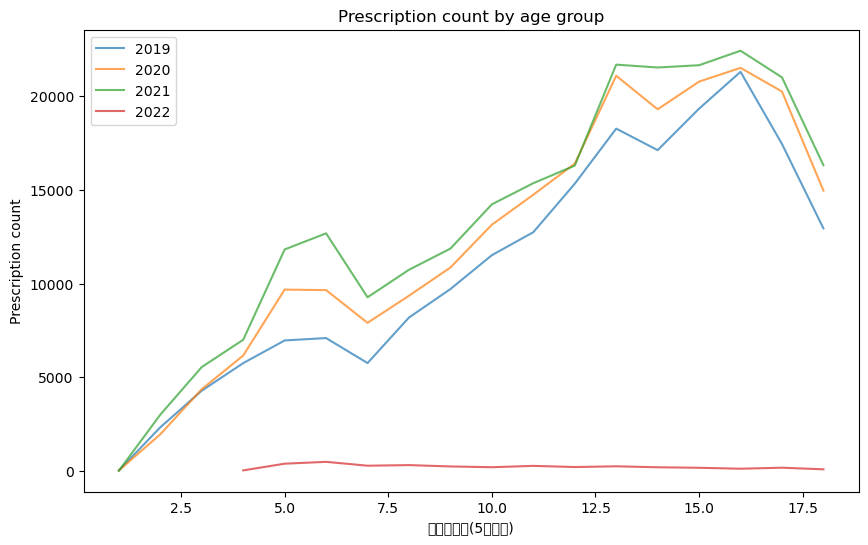

In [50]:
# 각 연령대별 처방전 수를 기준년도별로 시각화합니다
plt.figure(figsize=(10, 6))
for year in df['기준년도'].unique():
    df_year = df[df['기준년도'] == year]
    df_year.groupby('연령대코드(5세단위)')['처방내역일련번호'].count().plot(kind='line', alpha=0.7, label=year)
plt.title('Prescription count by age group')
plt.ylabel('Prescription count')
plt.legend()
plt.show()

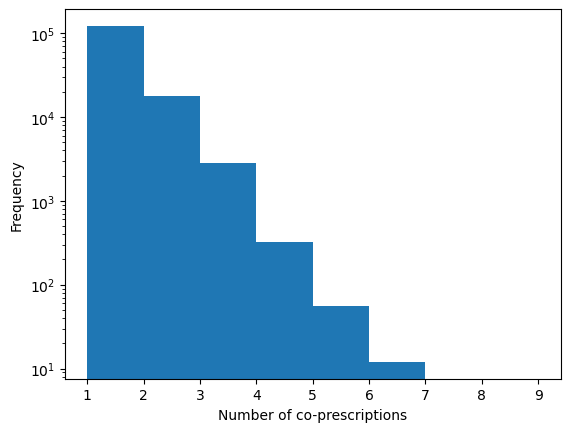

In [21]:
# 처방내역일련번호으로 그룹화하여 같이 처방된 약품의 개수를 세어봅니다.
prescription_counts = df.groupby('처방내역일련번호').size()

# 처방된 약품의 개수를 히스토그램으로 그립니다.
plt.hist(prescription_counts, bins=range(1, 10))
plt.xlabel('Number of co-prescriptions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

---

In [22]:
# 항우울제가 처방된 처방전의 리스트를 만듭니다.
prescriptions = df['처방내역일련번호'].unique()

In [23]:
# 원본 데이터에서 해당되는 처방전을 추출합니다.
rows = []
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(2).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(3).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])

# 추출한 행을 합칩니다.
df_full = pd.concat(rows)

In [24]:
# 추출한 데이터에 null 값이 있는지 확인합니다.
print(df_full.isnull().sum())

# 데이터에 중복된 행이 있는지 확인합니다.
print("중복된 행의 수:", df_full.duplicated().sum())

# null 값이 있는 행을 제거합니다.
df_full = df_full.dropna()

기준년도            0
가입자일련번호         0
처방내역일련번호        0
일련번호            0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
요양개시일자          0
약품일반성분명코드      90
1회 투약량          0
1일투약량           0
총투여일수           0
단가              0
금액              0
데이터 공개일자        0
dtype: int64
중복된 행의 수: 0


In [25]:
# 추출한 데이터를 CSV 파일로 저장합니다.
df_full.to_csv('./data/anti_depressant_prescription_all_meds.csv', index=False)